## Loss Functions

In this assignment, we will learn about loss functions. We will use a create a neural network and measure the model's performance using different loss functions.

In [123]:
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense

pd.set_option('display.max_rows', 100)

In [124]:
housing = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/housing.csv')

In [125]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


We will use the dataset above to predict housing prices using various features about each house. Our first step is to check for missing data. 

In [126]:
# Answer below:
missing = housing.isnull().sum() / len(housing)
missing

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Street           0.000000
Alley            0.937671
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.005479
MasVnrArea       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025342
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinSF1       0.000000
BsmtFinType2     0.026027
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF 

Remove columns that contain more than 30% of missing data. After removing those columns, remove the rows that contain at least one observation that is missing.

In [127]:
# Answer below:
print(missing[missing > 0.3])
housing = housing.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)
housing.isnull().sum() / len(housing)


Alley          0.937671
FireplaceQu    0.472603
PoolQC         0.995205
Fence          0.807534
MiscFeature    0.963014
dtype: float64


Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Street           0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.005479
MasVnrArea       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025342
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinSF1       0.000000
BsmtFinType2     0.026027
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF      0.000000
Heating     

In [128]:
housing = housing.dropna()
housing.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

There are some categorical variables that contain numeric data and some that do not. Print the type of each column to first see whether there is an issue with misclassification of column type.

In [129]:
# Answer below:
housing.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1094 non-null   int64  
 1   MSSubClass     1094 non-null   int64  
 2   MSZoning       1094 non-null   object 
 3   LotFrontage    1094 non-null   float64
 4   LotArea        1094 non-null   int64  
 5   Street         1094 non-null   object 
 6   LotShape       1094 non-null   object 
 7   LandContour    1094 non-null   object 
 8   Utilities      1094 non-null   object 
 9   LotConfig      1094 non-null   object 
 10  LandSlope      1094 non-null   object 
 11  Neighborhood   1094 non-null   object 
 12  Condition1     1094 non-null   object 
 13  Condition2     1094 non-null   object 
 14  BldgType       1094 non-null   object 
 15  HouseStyle     1094 non-null   object 
 16  OverallQual    1094 non-null   int64  
 17  OverallCond    1094 non-null   int64  
 18  YearBuil

We see that month sold and year sold are not variables that describe a feature of the house. While they do have relevance if we create a model containing a time series element, we will not include them here. Drop these columns. Also, remove the id column

In [130]:
# Answer below
housing = housing.drop(['Id', 'MoSold', 'YrSold'],axis=1)


Using the information about the column types, identify all the variables that will be converted into dummy variables. Include at least one numeric variable that you think should be converted as well.

In [131]:
# Answer below:
obj = housing.loc[:, housing.dtypes == 'object']
dummy = pd.concat([obj,housing['BsmtFullBath'],housing['BsmtHalfBath']], axis=1)
dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1459
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1094 non-null   object
 1   Street         1094 non-null   object
 2   LotShape       1094 non-null   object
 3   LandContour    1094 non-null   object
 4   Utilities      1094 non-null   object
 5   LotConfig      1094 non-null   object
 6   LandSlope      1094 non-null   object
 7   Neighborhood   1094 non-null   object
 8   Condition1     1094 non-null   object
 9   Condition2     1094 non-null   object
 10  BldgType       1094 non-null   object
 11  HouseStyle     1094 non-null   object
 12  RoofStyle      1094 non-null   object
 13  RoofMatl       1094 non-null   object
 14  Exterior1st    1094 non-null   object
 15  Exterior2nd    1094 non-null   object
 16  MasVnrType     1094 non-null   object
 17  ExterQual      1094 non-null   object
 18  ExterCond      1094 non-null

Convert the columns you selected above into dummy variables

In [132]:
# Answer below:
dummy = pd.get_dummies(dummy)
dummy


,BsmtFullBath,BsmtHalfBath,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,...,Functional_Min2,Functional_Mod,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1456,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1457,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1458,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [133]:
non_obj = housing.loc[:, housing.dtypes != 'object']
non_obj = non_obj.drop(['BsmtFullBath','BsmtHalfBath'], axis = 1)
data = pd.concat([non_obj, dummy], axis=1)
data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,BsmtFullBath,BsmtHalfBath,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,...,Functional_Min2,Functional_Mod,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,208500,1,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,181500,0,1,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,223500,1,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,140000,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,250000,1,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,175000,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,210000,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,266500,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,142125,1,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


Split the data into train and test with 20% of data in test.

In [134]:
# Answer below
from sklearn.model_selection import train_test_split
y = data.SalePrice
X = data.drop('SalePrice',axis=1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [135]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Create a model with 5 layers. The first layer should be a dense layer that takes in the input, the last layer should be of size 1. You determine the remaining layer sizes.

Use a linear activation for the output layer.

In [136]:
# Answer below
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

Compile the model with the RMSprop optimizer and mean square error loss. Use the MSE as a metric. Set batch size to 100 and epochs to 200. Fit the model and report the results.

In [137]:
# Answer below:
model.compile(loss='mse', optimizer='RMSprop', metrics=['mse'])
history1 = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=200, batch_size=100)

Epoch 1/200
9/9 [==============================] - 1s 25ms/step - loss: 41943474995.2000 - mse: 41943474995.2000 - val_loss: 42800713728.0000 - val_mse: 42800713728.0000
Epoch 2/200
9/9 [==============================] - 0s 8ms/step - loss: 42972662988.8000 - mse: 42972662988.8000 - val_loss: 42787831808.0000 - val_mse: 42787835904.0000
Epoch 3/200
9/9 [==============================] - 0s 7ms/step - loss: 40597521203.2000 - mse: 40597521203.2000 - val_loss: 42759307264.0000 - val_mse: 42759307264.0000
Epoch 4/200
9/9 [==============================] - 0s 10ms/step - loss: 42075647180.8000 - mse: 42075648000.0000 - val_loss: 42708680704.0000 - val_mse: 42708676608.0000
Epoch 5/200
9/9 [==============================] - 0s 7ms/step - loss: 41567916851.2000 - mse: 41567915212.8000 - val_loss: 42626342912.0000 - val_mse: 42626342912.0000
Epoch 6/200
9/9 [==============================] - 0s 8ms/step - loss: 41141209088.0000 - mse: 41141209088.0000 - val_loss: 42504282112.0000 - val_mse: 4

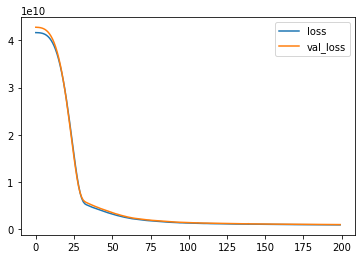

In [138]:
df = pd.DataFrame(history1.history)
df[['loss','val_loss']].plot()

Next, do the same but with mean absolute error loss. Use both MSE and MAE as metrics. Compare the results.

In [139]:
# Answer below:
model = Sequential()
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mae', optimizer='RMSprop', metrics=['mse','mae'])
history2 = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=200, batch_size=100)

Epoch 1/200
9/9 [==============================] - 1s 27ms/step - loss: 185671.1609 - mse: 41156495769.6000 - mae: 185671.1609 - val_loss: 187829.0000 - val_mse: 42802069504.0000 - val_mae: 187829.0000
Epoch 2/200
9/9 [==============================] - 0s 29ms/step - loss: 186828.9766 - mse: 41608951398.4000 - mae: 186828.9766 - val_loss: 187806.1562 - val_mse: 42793299968.0000 - val_mae: 187806.1562
Epoch 3/200
9/9 [==============================] - 0s 8ms/step - loss: 187897.8578 - mse: 41942508748.8000 - mae: 187897.8578 - val_loss: 187758.7031 - val_mse: 42775134208.0000 - val_mae: 187758.7031
Epoch 4/200
9/9 [==============================] - 0s 8ms/step - loss: 186243.0625 - mse: 41401970688.0000 - mae: 186243.0625 - val_loss: 187678.7969 - val_mse: 42744569856.0000 - val_mae: 187678.7969
Epoch 5/200
9/9 [==============================] - 0s 7ms/step - loss: 187709.9312 - mse: 42151582105.6000 - mae: 187709.9312 - val_loss: 187557.1250 - val_mse: 42698067968.0000 - val_mae: 18755

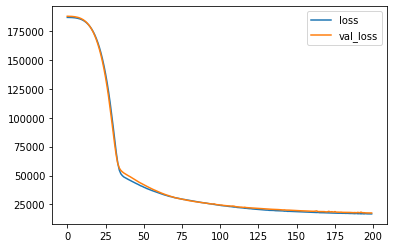

In [140]:
df = pd.DataFrame(history2.history)
df[['loss','val_loss']].plot()

Finally, try your model using mean squared logarithmic error. Compare the results.

In [141]:
# Answer below:
model = Sequential()
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='msle', optimizer='RMSprop', metrics=['mse','mae'])
history3 = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=200, batch_size=100)


Epoch 1/200
9/9 [==============================] - 1s 29ms/step - loss: 127.7145 - mse: 38735697510.4000 - mae: 181812.9172 - val_loss: 96.7302 - val_mse: 42801319936.0000 - val_mae: 187827.0156
Epoch 2/200
9/9 [==============================] - 0s 8ms/step - loss: 91.7992 - mse: 41026077081.6000 - mae: 185926.4703 - val_loss: 78.5575 - val_mse: 42795511808.0000 - val_mae: 187811.7500
Epoch 3/200
9/9 [==============================] - 0s 8ms/step - loss: 75.2074 - mse: 39558030131.2000 - mae: 182060.8687 - val_loss: 67.1270 - val_mse: 42786566144.0000 - val_mae: 187788.2812
Epoch 4/200
9/9 [==============================] - 0s 8ms/step - loss: 65.1933 - mse: 42901814067.2000 - mae: 189625.2437 - val_loss: 58.5194 - val_mse: 42773319680.0000 - val_mae: 187753.5781
Epoch 5/200
9/9 [==============================] - 0s 7ms/step - loss: 56.6454 - mse: 41565543628.8000 - mae: 185888.4469 - val_loss: 51.3282 - val_mse: 42753564672.0000 - val_mae: 187701.8281
Epoch 6/200
9/9 [================

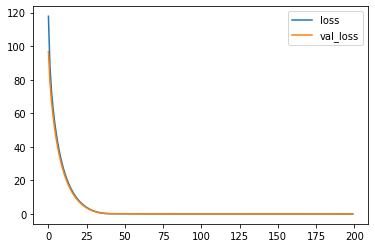

In [142]:
df = pd.DataFrame(history3.history)
df[['loss','val_loss']].plot()